In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import pickle

In [1]:
core2_h20 = dict(
r_signal = .275,
s_signal = 4.64e-9,
r_acc = 3.40e-8,
r_radio = 2.40e-2,
r_fn = 3.20e-3,
r_ibdbg = 5.50e-3,
s_bg = 6.58e-9
)

core1_h20 = dict(
r_signal = .397,
s_signal = 5.34e-9,
r_acc = 3.40e-8,
r_radio = 5.88e-2,
r_fn = .237,
r_ibdbg = .290,
s_bg = 5.52e-8
)

core2_wbls = dict(
r_signal = .279,
s_signal = 1.97e-8,
r_acc = 1.32e-8,
r_radio = 1.27e-2,
r_fn = 1.84e-5,
r_ibdbg = 7.52e-3,
s_bg = 1.09e-9
)

core1_wbls = dict(
r_signal = .405,
s_signal = 2.36e-8,
r_acc = 1.32e-8,
r_radio = 3.26e-2,
r_fn = .160,
r_ibdbg = .322,
s_bg = 1.80e-7
)

In [12]:
.405/.514**.5

0.5649024570598166

In [11]:
.279/np.sqrt(.020+1e-9**2)

1.9728279195104679

In [4]:
def save_obj(obj, name, directory='./'):
    with open(directory+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

In [6]:
core_rates = dict(core2_h20=core2_h20, core1_h20=core1_h20, core2_wbls=core2_wbls, core1_wbls=core1_wbls)

In [7]:
save_obj(core_rates, 'all_core_rates')

In [5]:
core1_withml = dict(
r_signal = .397*.96,
s_signal = 5.34e-9,
r_acc = 3.40e-8,
r_radio = 5.88e-2,
r_fn = .237*.0762,
r_ibdbg = .290*.96,
s_bg = 5.52e-8
)

In [42]:
def get_times(r_signal, s_signal, r_acc, r_radio, r_fn, r_ibdbg, s_bg):
    Z=3
    r_bg = r_acc + r_radio + r_fn + r_ibdbg
    sig_to_bg = r_signal / np.sqrt(r_bg + s_bg**2)
    
    anomaly = r_bg / (r_signal**2/Z**2 - s_bg**2)
    measurement = (r_bg + r_signal) / (r_signal**2/Z**2 - s_bg**2)
#     print('Days to anomaly: %.2f'%(anomaly))
#     print('Days to measurement: %.2f'%(measurement))
    return anomaly, measurement

Start with a simple rejector: 

In [60]:
guesses = np.random.randint(0, 2, 10000)
prob = np.random.random(10000)
fpr0, tpr0, thresholds0 = roc_curve(guesses, prob)
core1_noml = core1.copy()
core1_noml['r_signal'] = core1_noml['r_signal']*tpr0
core1_noml['r_fn'] = core1_noml['r_fn']*fpr0
core1_noml['r_ibdbg'] = core1_noml['r_ibdbg']*tpr0

In [22]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


In [ ]:
# got fpr, tpr from coupled signals 

In [39]:
core1_ml = core1.copy()
core1_ml['r_signal'] = core1_ml['r_signal']*tpr
core1_ml['r_fn'] = core1_ml['r_fn']*fpr
core1_ml['r_ibdbg'] = core1_ml['r_ibdbg']*tpr

In [71]:
anom0, meas0 = get_times(**core1)
anom, meas = get_times(**core1_ml)


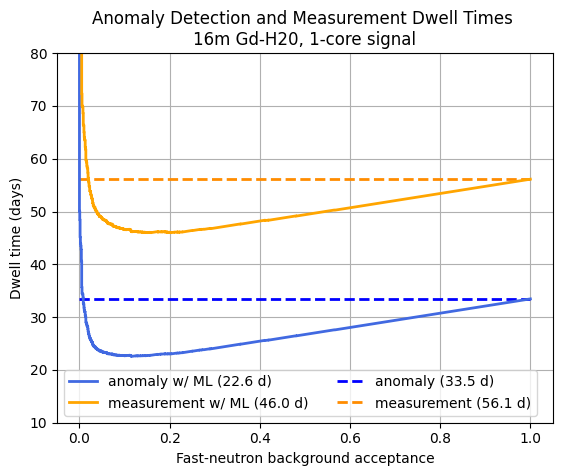

In [96]:
plt.plot(fpr[3:], anom[3:], 
         color='royalblue', lw=2, 
         label='anomaly w/ ML (%.1f d)'%(np.min(anom[3:]))
        )
plt.hlines(anom0, 0, 1, 
           color='blue', linestyle='--', lw=2, 
           label='anomaly (%.1f d)'%(anom0)
          )

plt.plot(fpr[3:], meas[3:], 
         color='orange', lw=2, 
         label='measurement w/ ML (%.1f d)'%(np.min(meas[3:]))
        )
plt.hlines(meas0, 0, 1, 
           color='darkorange', linestyle='--', lw=2, 
           label='measurement (%.1f d)'%(meas0)
          )

plt.legend(ncol=2)
plt.xlabel('Fast-neutron background acceptance')
plt.ylabel('Dwell time (days)')
plt.title("Anomaly Detection and Measurement Dwell Times \n16m Gd-H20, 1-core signal")
plt.ylim(10,80)
plt.grid()
# plt.xlim(0.0, 1)
plt.show()

In [97]:
core2_ml = core2.copy()
core2_ml['r_signal'] = core2_ml['r_signal']*tpr
core2_ml['r_fn'] = core2_ml['r_fn']*fpr
core2_ml['r_ibdbg'] = core2_ml['r_ibdbg']*tpr

In [98]:
anom2, meas2 = get_times(**core2)
anom2ml, meas2ml = get_times(**core2_ml)


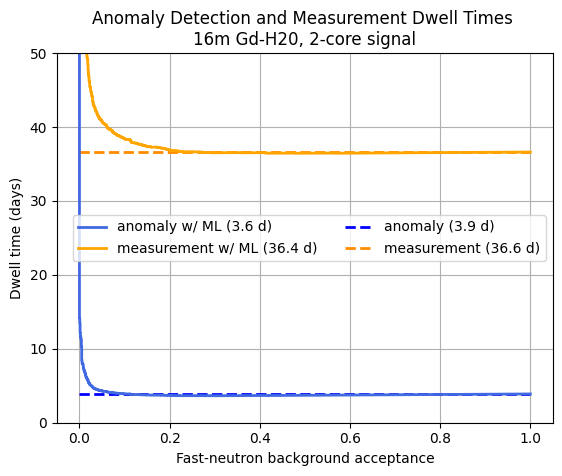

In [101]:
plt.plot(fpr[3:], anom2ml[3:], 
         color='royalblue', lw=2, 
         label='anomaly w/ ML (%.1f d)'%(np.min(anom2ml[3:]))
        )
plt.hlines(anom2, 0, 1, 
           color='blue', linestyle='--', lw=2, 
           label='anomaly (%.1f d)'%(anom2)
          )

plt.plot(fpr[3:], meas2ml[3:], 
         color='orange', lw=2, 
         label='measurement w/ ML (%.1f d)'%(np.min(meas2ml[3:]))
        )
plt.hlines(meas2, 0, 1, 
           color='darkorange', linestyle='--', lw=2, 
           label='measurement (%.1f d)'%(meas2)
          )

plt.legend(ncol=2)
plt.xlabel('Fast-neutron background acceptance')
plt.ylabel('Dwell time (days)')
plt.title("Anomaly Detection and Measurement Dwell Times \n16m Gd-H20, 2-core signal")
plt.ylim(0,50)
plt.grid()
# plt.xlim(0.0, 1)
plt.show()